### **데이터 증강(Data Augmentation)**
기계학습 및 딥 러닝 기법을 사용하는 경우, 현실적으로 데이터 셋이 부족한 경우가 많다. 데이터 증강(Data Augmentation)은 적은 양의 데이터를 바탕으로 다양한 알고리즘을 통해 데이터의 양을 늘리는 기술이다.

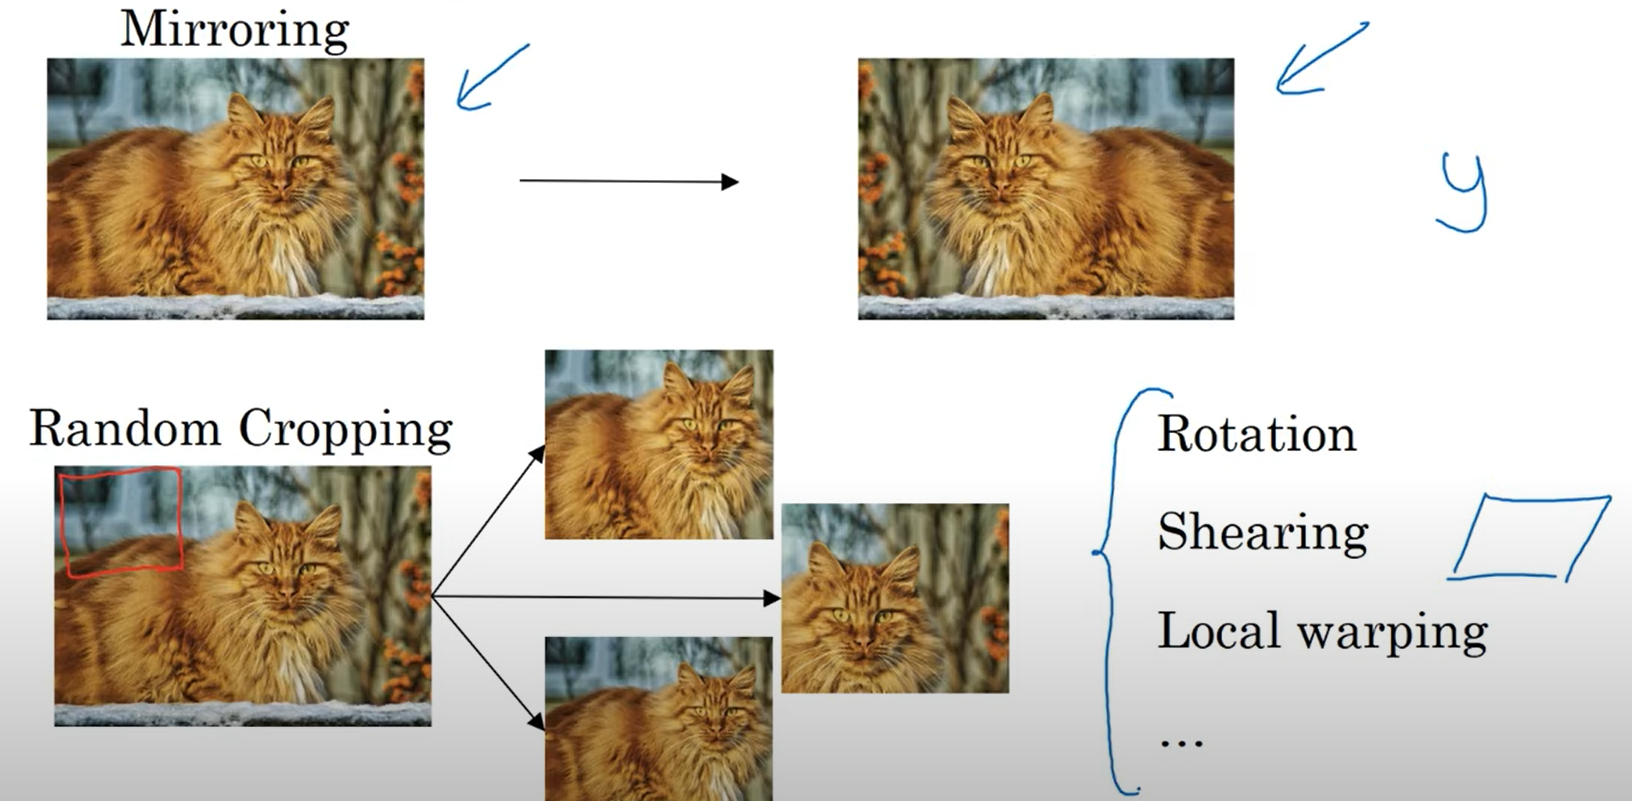

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from numpy import expand_dims

In [16]:
path = '/content/drive/MyDrive/TL_DA/'
image = load_img(path + 'cat.jpg')

(960, 568)

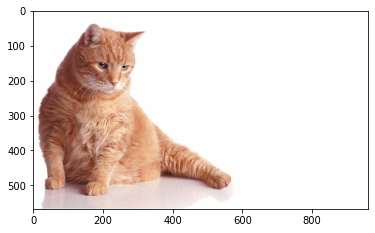

In [20]:
plt.imshow(image)
image.size

In [18]:
array = img_to_array(image)
array.shape

(568, 960, 3)

In [21]:
sample = expand_dims(array, axis=0)
sample.shape

(1, 568, 960, 3)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
datagen = ImageDataGenerator(rescale=1./255, 
                             horizontal_flip=True, 
                             width_shift_range=0.1, 
                             height_shift_range=0.1, 
                             rotation_range=5, 
                             shear_range=0.7, 
                             zoom_range=1.2, 
                             vertical_flip=True, 
                             fill_mode='nearest')

* rescale=1./255
* horizontal_flip=True: 수평 대칭 이미지를 50% 확률로 만들어 추가
* width_shift_range=0.1: 전체 크기의 15% 범위에서 좌우로 이동
* height_shift_range=0.1: 위, 아래로 이동
* rotation_range=5: 정해진 각도만큼 회전
* shear_range=0.7: 좌표 하나를 고정시키고 나머지를 이동
* zoom_range=1.2: 확대 또는 축소
* vertical_flip=True: 수직 대칭 이미지를 만듬
* fill_mode='nearest': 빈 공간을 채우는 방법
  - nearest 옵션은 가장 비슷한 색으로 채우게 됨

In [10]:
img = datagen.flow(sample,batch_size=1)

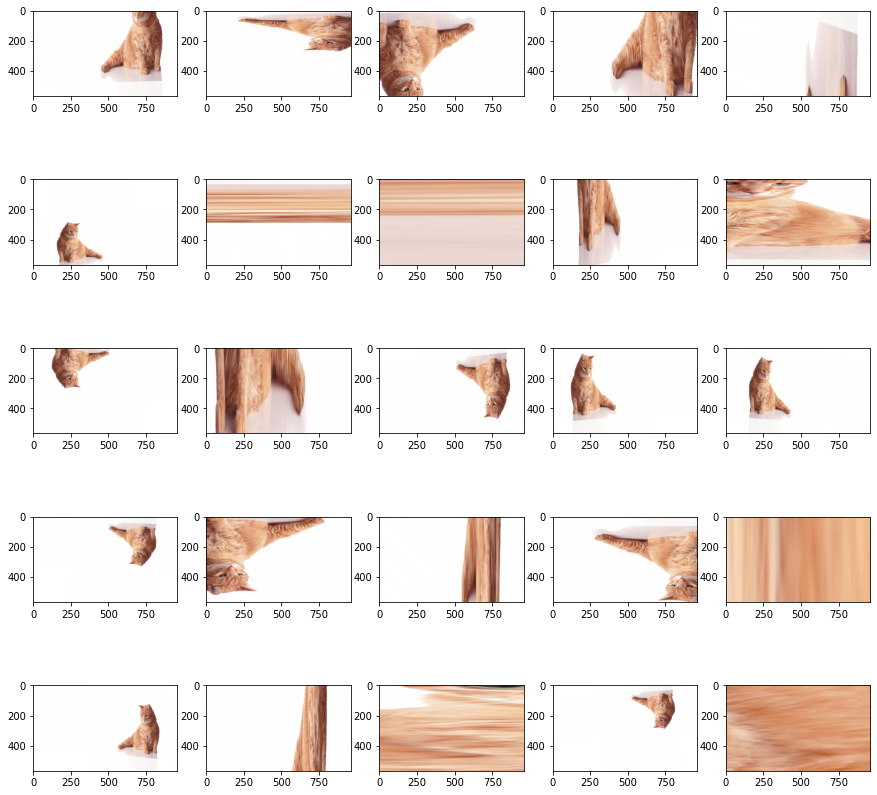

In [28]:
fig = plt.figure(figsize=(15, 15))
for i in range(25):
  plt.subplot(5, 5,i+1)
  image = img.next()
  plt.imshow(image[0])

In [29]:
i = 0
for batch in datagen.flow(sample, batch_size=1, save_to_dir='/content/drive/MyDrive/TL_DA/', save_prefix='cat', save_format='jpg'):
    i += 1
    if i > 20:
        break